# Understanding Jupyter
## h2
### h3
*italics* _italics_ **Bold element**

## Many Magic commands
line magic commands starts with % eg %lsmagic , %run any_python_code.py, %pwd.
Cell magic commands starts with %% .
CHeck %quickref to see reference and play with few commands 

To execute shell commands use ! eg !cd or  !pip install  some_module

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %uv  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%l

In [3]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

In [4]:
%pwd?

Docstring:
Return the current working directory path.

Examples
--------
::

  In [9]: pwd
  Out[9]: '/home/tsuser/sprint/ipython'
File:      c:\python310\lib\site-packages\ipython\core\magics\osm.py

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
x = np.array([1,2,3])
y = np.linspace(0, 3.0, num=3)
z = np.arange(12).reshape(2,6)  #.reshape(M,N) -> 2D shape
rn = np.random.normal(0,1,(6,4)) #mu, sigma, size=(M,N)
ru = np.random.rand(2,6)

In [10]:
#metadata
x.shape   # (3,)
x.ndim    #1
z.ndim   #2
z.shape  #(2,6)


(2, 6)

In [13]:
#Access
x[0]
z[0,0]
z[:, 0:2] #allrows, 0:2
z[z>2]
z[(z>2) & (z<4)]  #use () whenever we do , and -&, or - | and not - ~
#Mutate
z[0,0] = 20
z

array([[20,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [19]:
#Reshaping 
y                #(3,)
y[:, None]       #(3,1)  -> None means np.newaxis
y[:, np.newaxis]  #same as None 
y1 = y.reshape(3,-1)   #-1 means autocalculates

In [26]:
#many methods in np 
len(dir(np))
#methods generally operate elementwise 
np.sqrt(z)
(x + y1).shape  # x.shape = (3,) <- vector and y1.shape(3,1) => 3,3 <- broadcast
x / (y + 1)  # elementwise
z * ru  # elementwise 

array([[6.51933952, 0.60820408, 1.03718047, 1.78497659, 2.04792224,
        1.99855883],
       [1.330566  , 2.15264899, 5.71244184, 8.51856566, 0.08191907,
        7.47558349]])

In [30]:
#matrix multiplication 
res = np.asmatrix(z) * np.asmatrix(ru.T)  #(2,6) x (2,6).T , .T is transpose
res.I      #inverse

matrix([[ 0.63538152, -0.31279489],
        [-0.63442089,  0.35189189]])

In [32]:
#sum -- axis varying 
z.sum(axis=0)  #row varying -> Columns sum (6,)
z.sum(axis=1) #col varying - row sum -> (2,)

array([35, 51])

In [39]:
# Understand based on Shape
z1 = np.arange(100).reshape(2,2,5,5,1,1)  
z1.shape  # (2,2,5,5,1)  => 100
z1.ravel().shape  # (100,) #flatten 
z1.squeeze().shape #remove any 1 dimension 
z1.sum(axis=2).shape #(2,2,5,1,1)


(2, 2, 5, 1, 1)

In [40]:
#understanding vstack, hstack based on shape
ru.shape, rn.shape

((2, 6), (6, 4))

In [43]:
np.vstack( (ru, rn.reshape(4,6)) ).shape 
np.hstack( (ru.T, rn) ).shape 
np.hstack (  (np.vstack((ru,ru,ru)), rn) ).shape

(6, 10)

In [51]:
#Solve the system of equations 3 * x0 + x1 = 9 
#and x0 + 2 * x1 = 8, Use np.linalg.solve(a,b) where ax = b 
#Check the solution is correct by np.dot of a and x == b 
#CHeck help(np.linalg) and complete 
A = np.array([[3,1],[1,2]])b
b = np.array([9,8])
x = np.linalg.solve(A,b)
np.allclose(np.dot(A,x),b)  #np.dot(A,x) -> np.asmatrix(A) *  np.asmatrix(x.reshape(2,1)) 

True

In [58]:
np.asarray

<function numpy.asarray>

# Matplotlib

Text(2, 2, 'Hello')

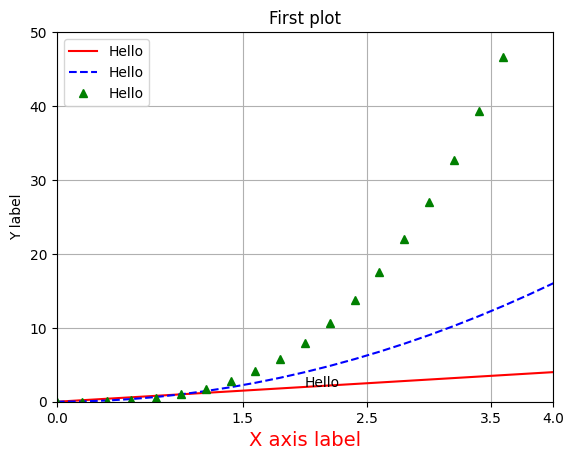

In [73]:
t = np.arange(0, 5, 0.2)
lines = plt.plot(t,t,'r-', t, t**2, 'b--', t, t**3, 'g^') #(x,y,'config') *N
plt.xlabel('X axis label', fontsize=14, color='red')
plt.ylabel('Y label')
plt.title("First plot")
plt.legend(["Hello"]*3, loc='best')
plt.grid(True)
plt.yscale('linear')
plt.xscale('linear')
plt.xlim(0,4)
plt.ylim(0,50)
plt.xticks([0, 1.5, 2.5, 3.5,4])
plt.text(2,2, r"Hello")
#plt.show() #plt.savefig('a.png')


character      description 
'-'             solid line style 
'--'            dashed line style 
'-.'            dash-dot line style 
':'             dotted line style 
'.'             point marker 
','             pixel marker 
'o'             circle marker 
'v'             triangle_down marker 
'^'             triangle_up marker 
'<'             triangle_left marker 
'>'             triangle_right marker 
'1'             tri_down marker 
'2'             tri_up marker 
'3'             tri_left marker 
'4'             tri_right marker 
's'             square marker 
'p'             pentagon marker 
'*'             star marker 
'h'             hexagon1 marker 
'H'             hexagon2 marker 
'+'             plus marker 
'x'             x marker 
'D'             diamond marker 
'd'             thin_diamond marker 
'|'             vline marker 
'_'             hline marker 

character   color 
'b'         blue 
'g'         green 
'r'         red 
'c'         cyan 
'm'         magenta 
'

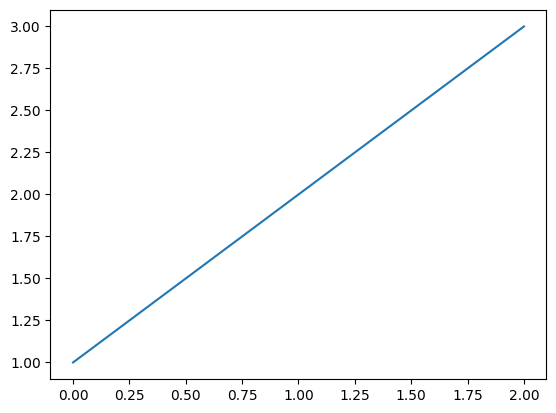

In [71]:
%run ..\0.2.plt_options.py


In [74]:
plt.setp(lines)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  animated: bool
  antialiased or aa: bool
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: :mpltype:`color` or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-

In [75]:
##Multiple plots
x1 = np.linspace(0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0, 2.0)
y2 = np.cos(2 * np.pi * x2)

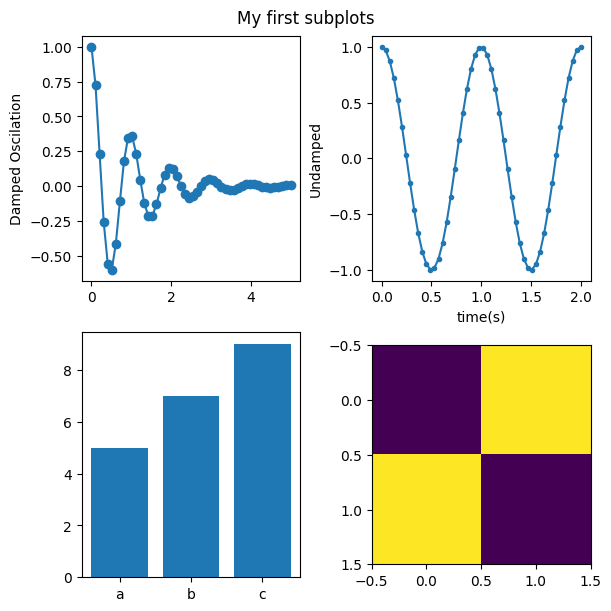

In [83]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, layout="constrained", figsize=(6,6))
fig.suptitle("My first subplots")
ax1.plot(x1,y1, 'o-')
ax1.set_ylabel('Damped Oscilation')
ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time(s)')
ax2.set_ylabel('Undamped')
ax3.bar(['a','b','c'], [5,7,9])
ax4.imshow([[1,2],[2,1]])

# Pandas

In [85]:
%pwd


'D:\\handson\\DAY7\\code\\data'

In [87]:
path = r"iris.csv"
iris = pd.read_csv(path) #https://pandas.pydata.org/docs/user_guide/io.html

In [90]:
len(dir(pd)) + len(dir(pd.DataFrame)) + len(dir(pd.Series))
#2D - DataFrame -> list of Columns/Series and row as index

997

In [91]:
#Metadata 
len(iris)  # no of rows 
iris.columns
iris.dtypes   #note that data is parsed, string is called object 
iris.index    #row_id 
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [94]:
#Access
iris.SepalLength #OR 
iris['SepalLength']  #<- series
iris[['SepalLength', 'PetalLength']]  # DF 
#iloc - index - [row_index_slice, column_index_slice], end is not included
#loc - id/name - [row_id_slice, col_name_slice], end is included 
iris.iloc[0:2, [0,1]]
iris.loc[0:1, ['SepalLength', 'SepalWidth']]
#.loc  can contain query 
iris.loc[(iris.SepalLength > 5.0) & (iris.SepalLength < 5.5), :]

SepalLength  SepalWidth  PetalLength  PetalWidth             Name
0           5.1         3.5          1.4         0.2      Iris-setosa
5           5.4         3.9          1.7         0.4      Iris-setosa
10          5.4         3.7          1.5         0.2      Iris-setosa
16          5.4         3.9          1.3         0.4      Iris-setosa
17          5.1         3.5          1.4         0.3      Iris-setosa
19          5.1         3.8          1.5         0.3      Iris-setosa
20          5.4         3.4          1.7         0.2      Iris-setosa
21          5.1         3.7          1.5         0.4      Iris-setosa
23          5.1         3.3          1.7         0.5      Iris-setosa
27          5.2         3.5          1.5         0.2      Iris-setosa
28          5.2         3.4          1.4         0.2      Iris-setosa
31          5.4         3.4          1.5         0.4      Iris-setosa
32          5.2         4.1          1.5         0.1      Iris-setosa
39          5.1         3.4          1.5         0.2      Iris-setosa
44          5.1         3.8          1.9         0.4      Iris-setosa
46          5.1         3.8          1.6         0.2      Iris-setosa
48          5.3         3.7          1.5         0.2      Iris-setosa
59          5.2         2.7          3.9         1.4  Iris-versicolor
84          5.4         3.0          4.5         1.5  Iris-versicolor
98          5.1         2.5          3.0         1.1  Iris-versicolor

In [99]:
#creation of column - elementwise
iris['dummy'] = iris.SepalLength - 2* iris.SepalWidth -3 
#abs of 
iris['dummy'] = np.abs(iris.dummy)  #always use np. functions, dont use builtin 
iris.columns
#Deletion - by default gives a new DF , to mutate original DF, use inplace=True
iris.drop(columns=['dummy'], inplace=True)
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [125]:
#applying functions 
iris.Name.unique()
iris.Name.value_counts()['Iris-setosa']
list(iris.Name.unique())
iris.values #numpy array
iris.values.tolist() #list of list 
df = pd.DataFrame(iris.values.tolist(), columns=['a','b','c','d','f'])
df.columns = [str(i) for i in range(5)]
df.columns
for e in df.index[::100]:
    print(e)
#conccat
pd.concat([iris,df], axis=1).shape  #hstack , based on index, increase column
df2 = df.copy()
df2.columns = iris.columns.copy()
#vstack 
pd.concat([iris, df2], axis=0).shape #based on column, increase rows 

0
100


(300, 5)

In [130]:
#COlumn is string or datetime, many new new function .str, .dt 
df3 = iris.Name.str.split("-", expand=True)
iris_n = iris.merge(df3, left_index=True, right_index=True) #pd.concat([iris,df3], axis=1)

In [131]:
iris_n.shape

(150, 7)

<Axes: >

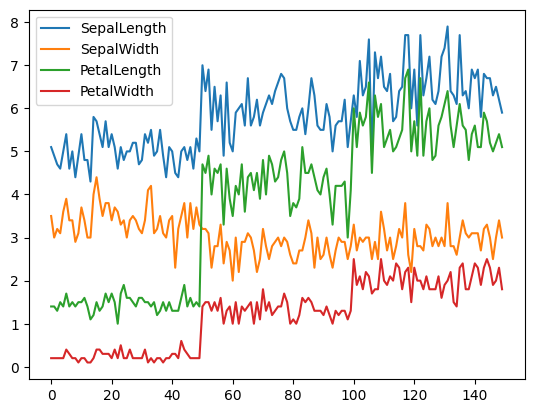

In [141]:
#axis = ? , by default columns 
iris.SepalLength.mean()
iris.iloc[:, 0:4].mean(axis=0)
iris.iloc[:, 0:4].mean(axis=1)
#Group by 
gr = iris.groupby('Name')
gr.mean()
gr.agg({'SepalLength': ['mean', 'max', 'min']}).to_excel("proc.xlsx")
#Multiindex - pl check doc on reading multiindex
#Plot
iris.iloc[:, 0:4].plot(kind='line')

### Handson
Read boston.csv 

How many cols and how many rows 

Display crim, zn, indus columns 

Display first two rows of all columns 

Find min of lstat and medv

For each rad, find min and max value of lstat and medv


## TimeSeries 

In [145]:
dft = pd.read_excel(r"Nifty-17_Years_Data-V1.xlsx", parse_dates=True, index_col=0, header=0)
dft = dft.asfreq('D')

In [148]:
dft.head()
dft.index

DatetimeIndex(['2000-06-01', '2000-06-02', '2000-06-03', '2000-06-04',
               '2000-06-05', '2000-06-06', '2000-06-07', '2000-06-08',
               '2000-06-09', '2000-06-10',
               ...
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01', '2018-01-02', '2018-01-03',
               '2018-01-04', '2018-01-05'],
              dtype='datetime64[ns]', name='Date', length=6428, freq='D')

In [153]:
dft['Open']
dft[0:5]  #first 5 index
dft.loc['2000': '2001', 'Open']
dft.loc['2000-06': '2001-09', 'Open']

Date
2000-06-01    1380.40
2000-06-02    1350.15
2000-06-03        NaN
2000-06-04        NaN
2000-06-05    1390.95
               ...   
2001-09-26     861.35
2001-09-27     873.15
2001-09-28     891.75
2001-09-29        NaN
2001-09-30        NaN
Freq: D, Name: Open, Length: 487, dtype: float64

In [155]:
#TS group- resample 
dft_s = dft.resample('YE')

In [157]:
dft_s['Open'].mean()

Date
2000-12-31     1337.423986
2001-12-31     1122.386290
2002-12-31     1055.961155
2003-12-31     1231.037598
2004-12-31     1755.625984
2005-12-31     2266.256574
2006-12-31     3352.826200
2007-12-31     4563.278514
2008-12-31     4353.315041
2009-12-31     4105.197942
2010-12-31     5461.261706
2011-12-31     5344.876518
2012-12-31     5343.346600
2013-12-31     5919.490600
2014-12-31     7360.618238
2015-12-31     8297.536895
2016-12-31     8099.163765
2017-12-31     9596.845363
2018-12-31    10499.110000
Freq: YE-DEC, Name: Open, dtype: float64

In [175]:
# which year crash happened
sr = dft_s[['Open', 'Close']].first()
sr['Close'] = sr.Close.shift(-1)  #shift -1 
sr.dropna(how='any', axis=0,inplace=True)
sr['diff'] = np.abs(sr.Close - sr.Open)
sr['diff'].idxmax()
sr.loc[[sr['diff'].idxmax()]].index.year.values.tolist()[0]

2008